# Gradient Descent


In [ ]:
import random
from typing import Callable, Iterator, List, Tuple

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

Frequently in data science, we try to the find the best model for a certain situation. Usually "best" means something like "minimises the error of its predictions" or "maximizes the likelihood of the data". In other words, it will represent the solution of an optimisation problem. That might mean finding the input the produces the largest or smallest possible output, known as maximising or minimising a function.

The gradient is the vector of partial derivatives of a function. It gives the input direction in which the function most quickly increases. So one approach to maximising a function is to pick a random starting point, compute the gradient, take a small step in the direction of the gradient (i.e., the direction that causes the function to increase the most), and repeat with the new starting point.


In [ ]:
def f(x: float, y: float) -> float:
    return x**2 + y**2


def f_derivative(x: float) -> float:
    return 2 * x


def difference_quotient(f: Callable[[float], float], x: float, y: float, h: float) -> float:
    return (f(x + h, y + h) - f(x, y)) / h


def gradient_descent(learning_rate: float, iterations: float, initial_point: Tuple[float, float]) -> np.ndarray:
    x, y = initial_point
    history = [(x, y)]
    for _ in range(iterations):
        gradient_x = f_derivative(x)
        gradient_y = f_derivative(y)

        # gradient_x = difference_quotient(f, x, y, h=0.00001)
        # gradient_y = difference_quotient(f, x, y, h=0.00001)

        x -= learning_rate * gradient_x
        y -= learning_rate * gradient_y
        history.append((x, y))
    return np.array(history)

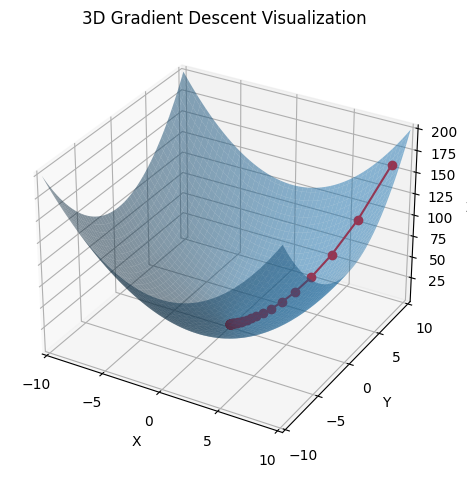

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
fig.patch.set_alpha(0)
ax.patch.set_alpha(0)

x_values = np.linspace(-10, 10, 100)
y_values = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x_values, y_values)
Z = f(X, Y)
ax.plot_surface(X, Y, Z, alpha=0.5)

path = gradient_descent(learning_rate=0.1, iterations=50, initial_point=(9, 9))
path_z = f(path[:, 0], path[:, 1])
ax.plot(path[:, 0], path[:, 1], path_z, "-r", marker="o")

ax.set_xmargin(0)
ax.set_ymargin(0)
ax.set_zmargin(0)
ax.set_xticks(np.arange(-10, 11, 5))
ax.set_yticks(np.arange(-10, 11, 5))
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title("3D Gradient Descent Visualization")
plt.tight_layout()
plt.show()


In the diagram above, the minimum is the global minimum. In a real example, the descent may get stuck in a local minimum. Lots of techniques like random restarts and momentum can help with this.


If $f$ is a function of one variable, its derivative at a point $x$ measures how $f(x)$ changes when we make a very small change to $x$. The derivative is defined as the limit of the difference quotients as $h$ approaches $0$. The derivative is the slope of the tangent to the graph of $f$ at the point $(x, f(x))$. The difference quotient is the slope of the secant line through the points $(x, f(x))$ and $(x + h, f(x + h))$. We can see that as $h$ approaches $0$, the secant line approaches the tangent line, and the slope of the secant line approaches the slope of the tangent line, which is the derivative.


In [ ]:
def f(x):
    return x**2


def f_derivative(x):
    return 2 * x


def difference_quotient(f, x, h):
    return (f(x + h) - f(x)) / h


In [ ]:
x_values = np.linspace(-10, 10, 100)
h = 0.5

derivative_values = [f_derivative(x) for x in x_values]
diff_quot_values = [difference_quotient(f, x, h) for x in x_values]

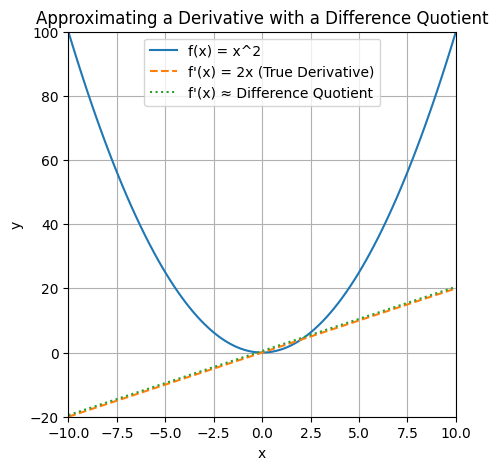

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))
fig.patch.set_alpha(0)
ax.patch.set_alpha(0)

ax.plot(x_values, [f(x) for x in x_values], label="f(x) = x^2")
ax.plot(x_values, derivative_values, label="f'(x) = 2x (True Derivative)", linestyle="--")
ax.plot(x_values, diff_quot_values, label="f'(x) ≈ Difference Quotient", linestyle=":")

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("Approximating a Derivative with a Difference Quotient")
ax.legend()
ax.grid()
ax.set_xmargin(0)
ax.set_ymargin(0)
plt.show()

When $f$ is a function of many variables, it has multiple partial derivatives, each indicating how $f$ changes when we make small changes in just one of the input variables. We can calculate the $i$th partial derivative by treating it as a function of just its $i$-th variable, holding the other variables fixed.


In [ ]:
def f(x, y):
    return x**2 + y**2

In [ ]:
def partial_derivative(f, point, var_idx, h):
    point_plus_h = point.copy()
    point_plus_h[var_idx] += h
    return (f(*point_plus_h) - f(*point)) / h

In [ ]:
x_values = np.linspace(-10, 10, 25)
y_values = np.linspace(-10, 10, 25)
h = 0.01

X, Y = np.meshgrid(x_values, y_values)

partial_x = np.vectorize(lambda x, y: partial_derivative(f, [x, y], 0, h))(X, Y)
partial_y = np.vectorize(lambda x, y: partial_derivative(f, [x, y], 1, h))(X, Y)

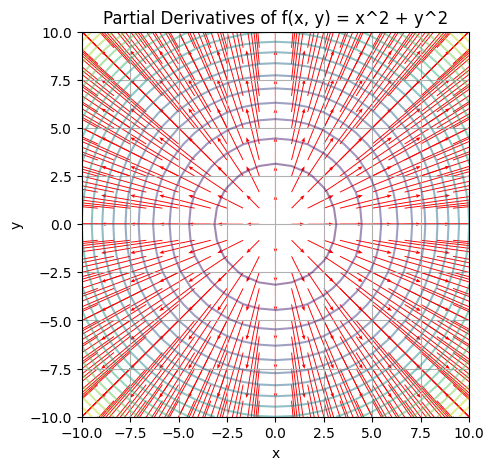

In [ ]:
Z = f(X, Y)

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
fig.patch.set_alpha(0)
ax.patch.set_alpha(0)

ax.contour(X, Y, Z, levels=20, alpha=0.5)
ax.quiver(X, Y, partial_x, partial_y, color="r", headwidth=4, headlength=5, scale=50)

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("Partial Derivatives of f(x, y) = x^2 + y^2")
ax.grid()
plt.show()


Quiver plots display vector fields by drawing arrows to represent the vectors at various points in the 2D space. In the context of our example, the quiver plot is used to visualise the partial derivatives of the function $f(x, y) = x^2 + y^2$ at various points in the $xy$ plane.

Here's how you should interpret the quiver plot:

- Direction: The direction of each arrow represents the direction of the gradient (partial derivatives) at that specific point. In other words, it shows the direction of the steepest increase of the function at that point.
- Magnitude: The length (or size) of each arrow represents the magnitude of the gradient. Longer arrows indicate a larger gradient, meaning that the function is changing more rapidly in that direction. Shorter arrows indicate a smaller gradient, which means the function is changing less rapidly in that direction.

In the example given, the quiver plot shows the partial derivatives of $f(x, y) = x^2 + y^2$. The arrows point away from the origin $(0, 0)$, because that is where the function has its minimum value, and they point in the direction of the steepest increase. The lengths of the arrows increase as they get further away from the origin, indicating that the rate of change of the function is higher at those points.


## Choosing the step size


It is easy to see in which direction we should move but choosing the size of the steps to take is less obvious. Too small, and gradient descent will take forever; too big, and we could take giant steps that overshoot the minimum and could make the function get larger or even be undefined. Options include:

- Using a fixed step size
- Gradually shrinking the step size over time
- At each step, choosing the step size that minimizes the value of the objective function. This sounds great but is a costly computation.


## Using Gradient Descent to Fit Models


**Parameterised Models**

A parameterised model is a mathematical or computational representation of a system or process that relies on parameters to describe its behavior, relationships, or properties. In the context of machine learning, statistics, and data science, these models are used to represent complex relationships between variables and predict outcomes based on input data.

Parameters are variables in the model that can be adjusted or learned from data to optimise the model's performance. The process of adjusting these parameters to minimise the error between the model's predictions and the actual observed data is called model fitting or training.

For example, in a linear regression model, the parameters are the coefficients of the independent variables (slope) and the intercept. These parameters are adjusted to find the best-fitting line that minimises the difference between the predicted and observed values.

Parameterised models can be found in various forms, such as linear models, neural networks, decision trees, and support vector machines, to name a few. The choice of model and the number of parameters usually depend on the problem at hand, the complexity of the relationships between variables, and the available data.


In this example we have some input data `xs` between -50 and 50.

We'll be fitting a simple linear regression model to this data. It takes the form of the equation

$$y = mx + b$$

where parameter $m$ is the slope of our linear relationship and parameter $b$ is the intercept.

The `ys` are also synthetically generated so we can easily see when the model is perfectly fitted.


In [ ]:
slope = 30
intercept = 7

xs = np.array([x for x in range(-50, 50)])
ys = np.array([slope * x + intercept for x in xs])

We will now use gradient descent to learn what the values of $m$ and $b$ parameters should be. It does this by adjusting the parameters in a direction the will minimise the _mean squared error_ of the model. The formula for mean squared error is

$$MSE = \frac{1}{n}\sum_{i=1}^n(y_i - \hat{y_i})^2$$

where:

- $y_i$ is the actual value of the $i$-th data point
- $\hat{y_i}$ is the predicted value of the $i$-th data point, or $mx_i + b$

We can rewrite this equation as

$$f(m, b) = \frac{1}{n}\sum_{i=1}^n(y_i - (mx_i + b))^2$$

The MSE can tell us how good our model with its current parameters is. But in order to know how to adjust the parameters to improve the model, we need to take the partial derivatives of the MSE with respect to those parameters. This will tell us the MSE's _gradient_. The gradient is a vector that points in the direction of greatest increase of the function. So if we take a small step in the direction of the gradient, we should be able to slightly improve the model. We can repeat this process until the gradient is zero, which means we have found the minimum of the function.

We need to use the chain rule to find the partial derivatives. The formula for the chain rule is:

$$f(g(x))' = f'(g(x))g'(x)$$

where f is the outer function and g is the inner function.

In our case, the outer function $()^2$ and the inner function is $y - mx + b$. Therefore:

$$f'(m) = 2x$$

To take the partial derivate of $g(x)$ with respect to $m$, we treat everything that is not $m$ as a constant equal to 0. We derive the resulting $0 - (mx + 0)$ normally. The derivative of $mx$ is just $x$. Therefore:

$$g'(m) = -x$$

Plugging these values into the chain rule, we get:

$$f(g(m))' = -2x(y - mx + b)$$

We can repeat the process with respect to $b$. Setting everything that is not $b$ to 0. So $y - mx + b$ becomes $(0 - (0 + b))$. The derivative of $b$ is 1. Therefore:

$$f'(b) = 2x$$

$$g'(b) = -1$$

Plugging these values into the chain rule, we get:

$$f(g(b))' = -2(y - mx + b)$$

We can now see how this would get implemented in code. $y - mx + b$ is effectively the error of the model. So we will calculate that each epoch and plug it into the partial derivative formulae above.


In [ ]:
def linear_gradient(xs: np.ndarray, ys: np.ndarray, params: List[float]) -> List[float]:
    slope, intercept = params
    predicted = slope * xs + intercept
    error = predicted - ys
    grad = [2 * error * xs, 2 * error]
    return grad


We begin by randomly initialising the parameters $m$ and $b$.

In each epoch we then:

- Calculate the error of the model
- Use the error to find the gradients
- Adjust the parameters in the direction of the gradients, mediated by the learning rate


In [ ]:
learning_rate = 0.001
params = random.uniform(-1, 1), random.uniform(-1, 1)
for epoch in range(5001):
    grads = np.array([linear_gradient(x, y, params) for x, y in zip(xs, ys)])
    grads_mean = np.mean(grads, axis=0)
    params = -learning_rate * grads_mean + params
    if epoch % 500 == 0:
        print(epoch, params)

0 [50.58096189 -0.43517479]
500 [29.99836109  4.27121238]
1000 [29.9993975   5.99683803]
1500 [29.99977851  6.63121573]
2000 [29.99991857  6.86442684]
2500 [29.99997007  6.95016034]
3000 [29.999989    6.98167785]
3500 [29.99999595  6.99326438]
4000 [29.99999851  6.99752384]
4500 [29.99999945  6.99908971]
5000 [29.9999998   6.99966536]


### Minibatch Gradient Descent


If our dataset was bigger, calculating the average gradient across the entire dataset would be too computationally expensive. We can instead calculate the average gradient across a random sample of the dataset. This is called _minibatch gradient descent_.


In [ ]:
def minibatches(dataset: np.ndarray, batch_size: int, shuffle: bool = True) -> Iterator[np.ndarray]:
    batch_starts = [start for start in range(0, dataset.shape[0], batch_size)]
    if shuffle:
        random.shuffle(batch_starts)
    for start in batch_starts:
        end = start + batch_size
        yield dataset[start:end]


learning_rate = 0.001
params = random.uniform(-1, 1), random.uniform(-1, 1)
for epoch in range(1001):
    for batch in minibatches(np.array(list(zip(xs, ys))), batch_size=10):
        grads = np.array([linear_gradient(x, y, params) for x, y in batch])
        grads_mean = np.mean(grads, axis=0)
        params = -learning_rate * grads_mean + params
    if epoch % 100 == 0:
        print(epoch, params)


0 [19.38373599  2.11300616]
100 [29.95912272  6.62594362]
200 [30.03467854  6.82609668]
300 [29.9853877   6.98356763]
400 [29.99999981  6.99999429]
500 [29.99999998  6.99999987]
600 [30.  7.]
700 [30.  7.]
800 [30.  7.]
900 [30.  7.]
1000 [30.  7.]


### Stochastic Gradient Descent


If the batch size was 1, we would would be taking gradient steps based on one training example at a time.


In [ ]:
learning_rate = 0.001
params = random.uniform(-1, 1), random.uniform(-1, 1)
for epoch in range(1001):
    for x, y in zip(xs, ys):
        grads = np.array([linear_gradient(x, y, params)])
        grads_mean = np.mean(grads, axis=0)
        params = -learning_rate * grads_mean + params
    if epoch % 100 == 0:
        print(epoch, params)

0 [30.155556   -0.74234775]
100 [30.0019384   6.90352083]
200 [30.00002415  6.99879775]
300 [30.0000003   6.99998502]
400 [30.00000001  6.99999981]
500 [30.  7.]
600 [29.99999999  7.        ]
700 [29.99999999  7.        ]
800 [30.  7.]
900 [30.  7.]
1000 [30.  7.]


This is known as stochastic gradient descent (although somtimes minibatch gradient descent is also called this). For our extremely simple example it finds the optimal parameters very quickly. In more complicated examples the gradient for a single example might not be quite different to the gradient for the entire dataset. So we might not find the optimal parameters as quickly. We also miss out on the computational efficiency vectorisation our computations.


## References


- [Gradient Descent From Scratch](https://towardsdatascience.com/gradient-descent-from-scratch-e8b75fa986cc) - Arseny Turin
- Data Science from Scratch 2nd Edition (Chapter 8) - Joel Grus
